# CNN without augmentation

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Input,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_images_dir='/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images'
normal_images_dir='/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images'

In [3]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(3616):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img,(200, 200))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = img / 255.0
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [4]:
covidUrls = os.listdir(covid_images_dir)
covidImages, covidTargets = loadImages(covid_images_dir, covidUrls, 1)
print(len(covidImages))

3616


In [5]:
del covidUrls
gc.collect()


0

In [6]:
normal_urls = os.listdir(normal_images_dir)
normalImages, normalTargets = loadImages(normal_images_dir, normal_urls, 0)
print(len(normalImages))

3616


In [7]:
del normal_urls
gc.collect()


0

In [8]:
data = np.r_[covidImages, normalImages]
data=np.expand_dims(data,axis=-1)
print(data.shape)

(7232, 200, 200, 1)


In [9]:
del normalImages,covidImages
gc.collect()


0

In [10]:
targets = np.r_[covidTargets, normalTargets]

In [11]:
targets.shape

(7232,)

In [12]:
del normalTargets,covidTargets
gc.collect()


0

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.20,random_state=0,shuffle=True)

In [14]:
del data,targets
gc.collect()

0

In [15]:

## remove vertical_flip=True,zoom_range=0.2, and try again and compare results ##
data_gen=ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='nearest',

)

In [16]:
# aug_images=[]
# aug_labels=[]
# for index,image in enumerate(x_train):
#     counter=0
#     # print(f'Processing image : {index + 1}')
#     for i in data_gen.flow(image.reshape((1,)+image.shape),batch_size=1):
#         aug_images.append(i.reshape(200,200,1))
#         aug_labels.append(y_train[index])
#         counter=counter+1
#         if counter >= 1:
#             break
    
    

In [17]:
# x_train=np.concatenate((x_train,np.array(aug_images)))
# y_train=np.concatenate((y_train,np.array(aug_labels)))

In [19]:
# del aug_images,aug_labels
# gc.collect()


In [20]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=10,       
    restore_best_weights=True  
)

In [21]:
inputshape=(200,200,1)

In [22]:
model = Sequential([
    Input(shape=inputshape), 
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.15),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.15),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.15),
    
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.15),
    
    
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.15),
    
    
    Flatten(), 
    
    Dense(1024, activation='relu'),
    Dropout(0.2),
    
    Dense(512, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])


In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train,batch_size=32,epochs=100,validation_data=(x_test, y_test),callbacks=early_stopping)

Epoch 1/100


I0000 00:00:1729509604.267880      99 service.cc:145] XLA service 0x79bf20047850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729509604.267940      99 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/181 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.4297 - loss: 0.6955   

I0000 00:00:1729509622.536294      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


181/181 ━━━━━━━━━━━━━━━━━━━━ 76s 306ms/step - accuracy: 0.5678 - loss: 0.6617 - val_accuracy: 0.7415 - val_loss: 0.5281
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.7361 - loss: 0.5210 - val_accuracy: 0.7733 - val_loss: 0.4845
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.7812 - loss: 0.4440 - val_accuracy: 0.7560 - val_loss: 0.4741
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.7981 - loss: 0.4108 - val_accuracy: 0.8321 - val_loss: 0.3871
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.8711 - loss: 0.3039 - val_accuracy: 0.8687 - val_loss: 0.3061
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.8963 - loss: 0.2584 - val_accuracy: 0.9032 - val_loss: 0.2474
Epoch 7/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.9017 - loss: 0.2495 - val_accuracy: 0.8874 - val_loss: 0.2748
Epoch 8/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.9108 - loss: 0.2210 - val

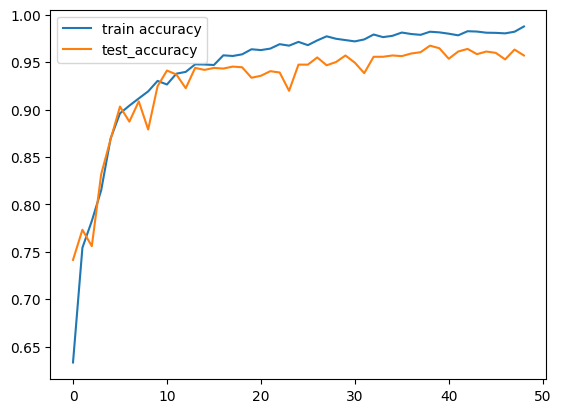

In [25]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

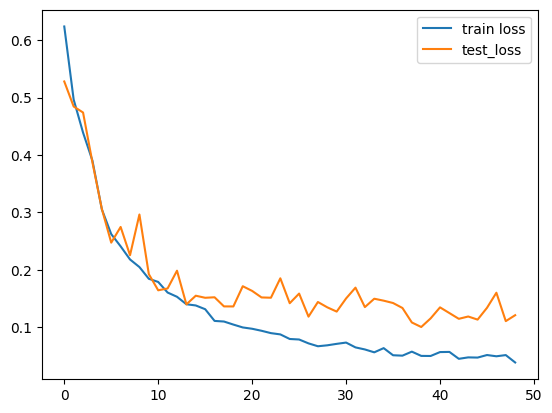

In [26]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [27]:
model.evaluate(x_test,y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9666 - loss: 0.0954


[0.10052398592233658, 0.9675189852714539]

In [28]:
y_pred = [1 if i > 0.5 else 0 for i in model.predict(x_test)]

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [29]:
accuracy_score(y_pred,y_test)

0.967519004837595

In [30]:
precision_score(y_pred,y_test)

0.9619718309859155

In [31]:
recall_score(y_pred,y_test)

0.9715504978662873

In [32]:
CM=confusion_matrix(y_pred,y_test)

<Axes: >

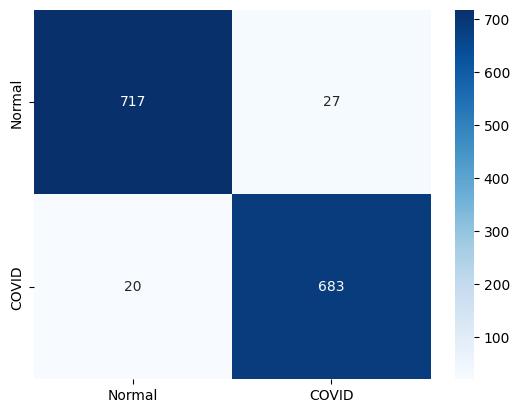

In [33]:
labels = ['Normal', 'COVID']
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

In [34]:
evaluation_metric={'accuracy':accuracy_score(y_pred,y_test),'Recall':recall_score(y_pred,y_test),'percession':precision_score(y_pred,y_test),'f1':f1_score(y_pred,y_test)}

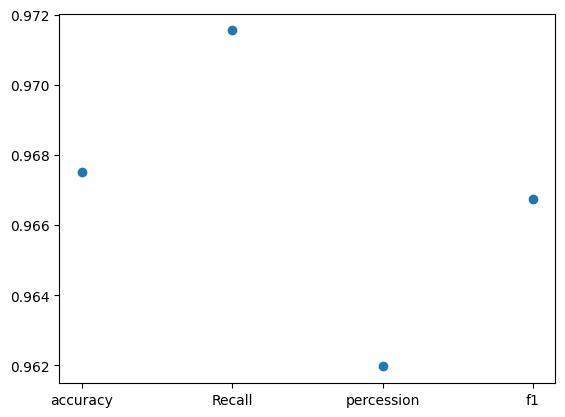

In [36]:
plt.scatter(evaluation_metric.keys(),evaluation_metric.values())
plt.show()